In [ ]:
'''
Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
'''



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
water = pd.read_csv('water.csv', usecols = ['location', 'town', 'mortality', 'hardness'])

water.info()
water.describe()
water.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


<Axes: title={'center': 'Зависимость средней годовой смертности от жесткости воды'}, xlabel='hardness', ylabel='mortality'>

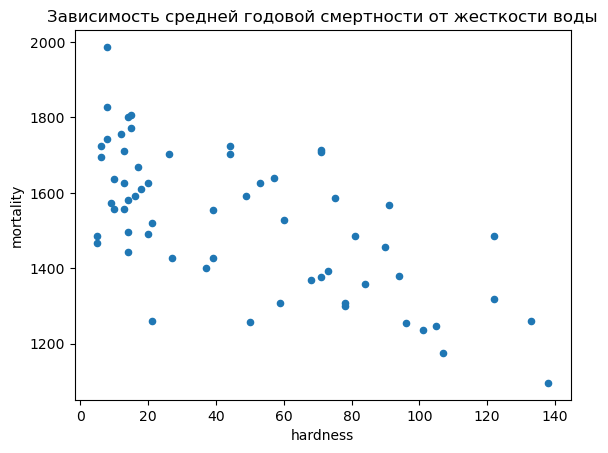

In [ ]:
water.plot(kind='scatter', x='hardness', y='mortality', title='Зависимость средней годовой смертности от жесткости воды')

# визуально зависимость просматривается

In [ ]:
# считаем коэф. корреляции Пирсона
water[['hardness', 'mortality']].corr()

# есть приемлемая отрицательная связь

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
# считаем коэф. корреляции Спирмана
water[['hardness', 'mortality']].corr(method='spearman')

# есть приемлемая отрицательная связь

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(water[['hardness']], water['mortality'], random_state=42)

print(X_train.shape)
X_test.shape

(45, 1)


(16, 1)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.coef_)
print(model.intercept_)

[-3.31576799]
1678.9405326885008


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1330.78489376, 1645.78285279, 1632.51978083, 1533.04674114,
       1420.31062948, 1612.62517289, 1237.94339004, 1430.25793345,
       1609.3094049 , 1659.04592475, 1483.31022129, 1410.36332551,
       1549.62558108, 1632.51978083, 1443.52100541, 1549.62558108])

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации



0.410213439338294

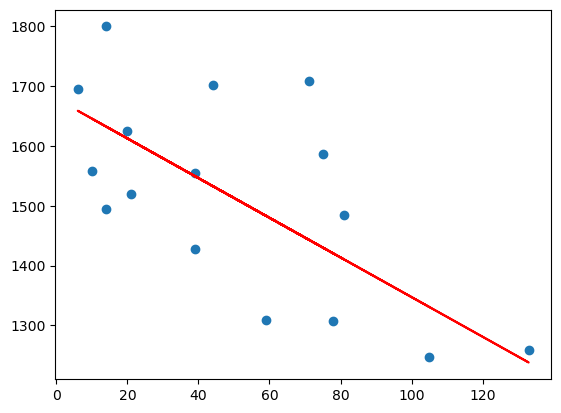

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

Text(0, 0.5, 'Остатки')

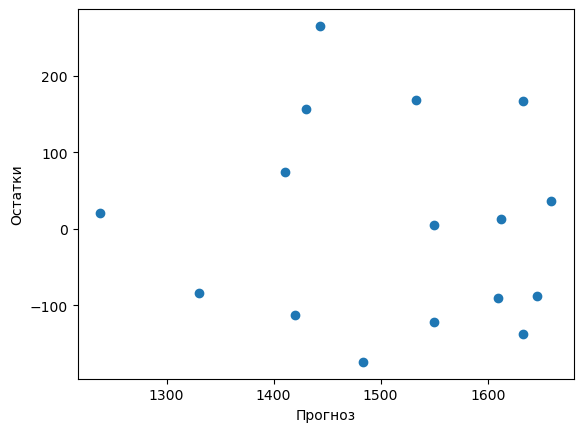

In [ ]:
# посмотрим на остатки
plt.scatter(y_pred, (y_test - y_pred))
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

# остатки разбросаны хаотично

<Axes: title={'center': 'Зависимость средней годовой смертности от жесткости воды (Юг)'}, xlabel='hardness', ylabel='mortality'>

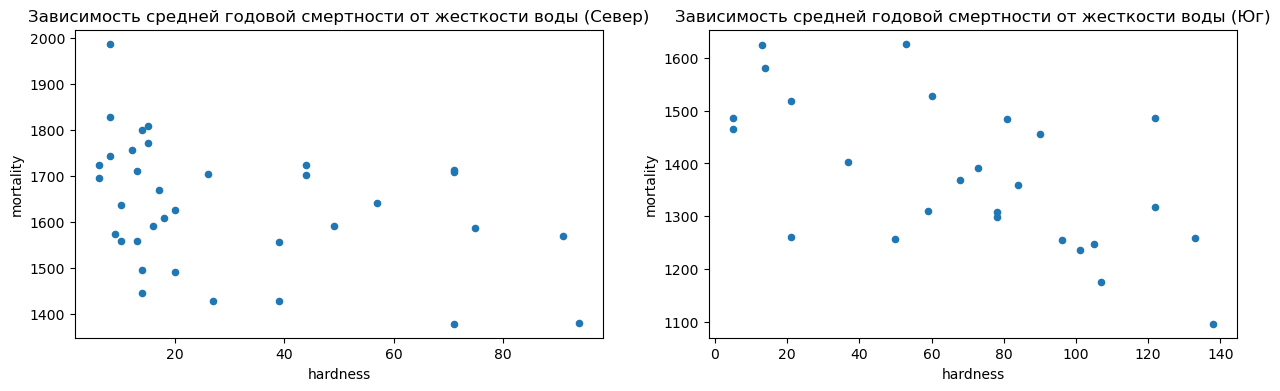

In [ ]:
'''
Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности
'''

water_n = water.loc[water.location == 'North']
water_s = water.loc[water.location == 'South']

fig, axes = plt.subplots(nrows=1, ncols=2)

water_n.plot(ax=axes[0], kind='scatter', figsize=( 15 , 4 ), x='hardness', y='mortality', title='Зависимость средней годовой смертности от жесткости воды (Север)')
water_s.plot(ax=axes[1], kind='scatter', x='hardness', y='mortality', title='Зависимость средней годовой смертности от жесткости воды (Юг)')



In [ ]:
# считаем коэф. корреляции Пирсона
print('коэф. корреляции Пирсона. Север')
print(water_n[['hardness', 'mortality']].corr())

# Север - связь слабо отрицательна


print('\nкоэф. корреляции Пирсона. Юг')
print(water_s[['hardness', 'mortality']].corr())

# Юг - приемлемая отрицательная связь

коэф. корреляции Пирсона. Север
           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000

коэф. корреляции Пирсона. Юг
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000


In [ ]:
# считаем коэф. корреляции Спирмана

print('коэф. корреляции Спирмана. Север')
print(water_n[['hardness', 'mortality']].corr(method='spearman'))

# Север - связь слабо отрицательна

print('\nкоэф. корреляции Спирмана. Юг')
print(water_s[['hardness', 'mortality']].corr(method='spearman'))

# Юг - приемлемая отрицательная связь

коэф. корреляции Спирмана. Север
           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000

коэф. корреляции Спирмана. Юг
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000


In [ ]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(water_n[['hardness']], water_n['mortality'], random_state=42)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(water_s[['hardness']], water_s['mortality'], random_state=42)

print(f'Север. Тренеровочная и тестовая последовательность: {X_train_n.shape}, {X_test_n.shape}')
print(f'Юг. Тренеровочная и тестовая последовательность: {X_train_s.shape}, {X_test_s.shape}')

Север. Тренеровочная и тестовая последовательность: (26, 1), (9, 1)
Юг. Тренеровочная и тестовая последовательность: (19, 1), (7, 1)


In [ ]:
model_n = LinearRegression()
model_n.fit(X_train_n, y_train_n)

model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)

LinearRegression()

In [ ]:
print('Север')
print(model_n.coef_)
print(model_n.intercept_)

print('\nЮг')
print(model_s.coef_)
print(model_s.intercept_)

Север
[-2.14659196]
1691.0175604303595

Юг
[-3.12141428]
1604.2662828795662


In [ ]:
print('Север')
y_pred_n = model_n.predict(X_test_n)
print(y_pred_n)

print('\nЮг')
y_pred_s = model_s.predict(X_test_s)
print(y_pred_s)

Север
[1673.84482478 1671.69823282 1660.96527304 1678.13800869 1656.67208912
 1538.60953151 1596.56751434 1673.84482478 1607.30047412]

Юг
[1223.45374102 1588.65921149 1276.51778374 1223.45374102 1488.77395461
 1538.71658305 1420.10284051]


In [ ]:
print('коэффициента детерминации Север')
print(model_n.score(X_test_n, y_test_n)) # метод возвращает значение коэффициента детерминации

print('\nкоэффициента детерминации Юг')
print(model_s.score(X_test_s, y_test_s)) # метод возвращает значение коэффициента детерминации

# коэффициентs детерминации меньше ноля, построенным моделям доверять нельзя

коэффициента детерминации Север
-0.09826474145023711

коэффициента детерминации Юг
-2.0816097873391914


<Axes: title={'center': 'Юг'}, xlabel='hardness', ylabel='mortality'>

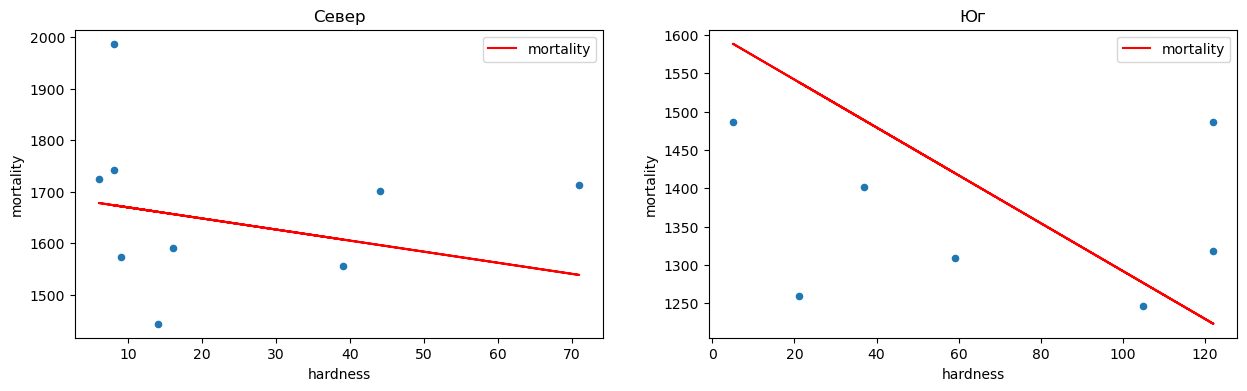

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)


pd.DataFrame({'hardness':X_test_n.hardness, 'mortality':y_test_n}).plot(ax=axes[0],  kind='scatter', figsize=( 15 , 4 ), x='hardness', y='mortality')
pd.DataFrame({'hardness':X_test_n.hardness, 'mortality':y_pred_n}).plot(ax=axes[0], x='hardness', y='mortality', c='r', title = 'Север')

pd.DataFrame({'hardness':X_test_s.hardness, 'mortality':y_test_s}).plot(ax=axes[1],  kind='scatter', figsize=( 15 , 4 ), x='hardness', y='mortality')
pd.DataFrame({'hardness':X_test_s.hardness, 'mortality':y_pred_s}).plot(ax=axes[1], x='hardness', y='mortality', c='r', title = 'Юг')


<Axes: title={'center': 'Юг'}, xlabel='Прогноз', ylabel='Остатки'>

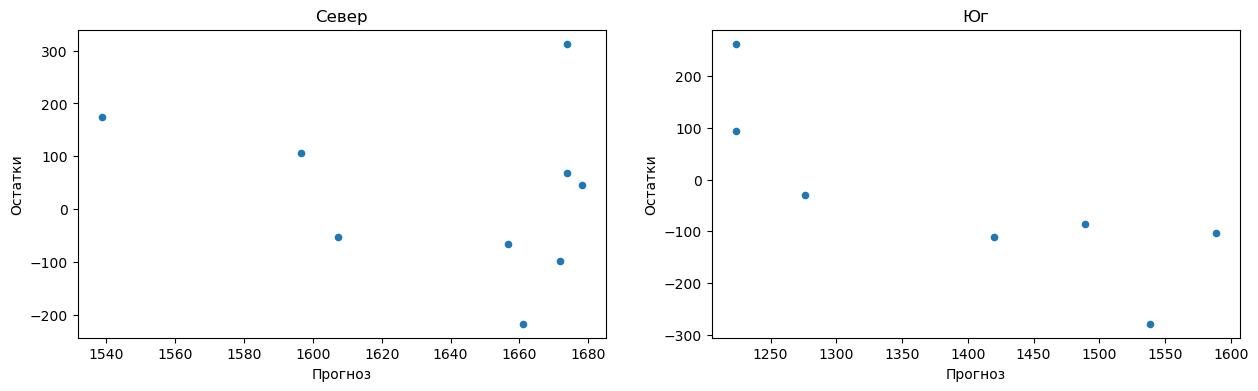

In [ ]:
# посмотрим на остатки

fig, axes = plt.subplots(nrows=1, ncols=2)

pd.DataFrame({'Прогноз':y_pred_n, 'Остатки':(y_test_n - y_pred_n)}).plot(ax=axes[0],  kind='scatter', figsize=( 15 , 4 ), y='Остатки', x='Прогноз', title = 'Север')
pd.DataFrame({'Прогноз':y_pred_s, 'Остатки':(y_test_s - y_pred_s)}).plot(ax=axes[1],  kind='scatter', figsize=( 15 , 4 ), y='Остатки', x='Прогноз', title = 'Юг')
